# Analysis of Universite and Vacances Datasets in R
This notebook performs data analysis using Correspondence Analysis (CA), chi-squared tests, and profile transformations.

In [1]:
# Load the required library for correspondence analysis
library(FactoMineR)

In [2]:
# Load the universite dataset
universite <- read.csv("universite.csv", sep=";", header=TRUE, row.names = 1, fileEncoding = "ISO-8859-1")
universite

,Licence.F,Licence.H,Master.F,Master.H,Doctorat.F,Doctorat.H,Total.F,Total.H,Total.Licence,Total.Master,Total.Doctorat,Total
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Droit-sciences politiques,69373,37317,42371,21693,4029,4342,115773,63352,106690,64064,8371,179125
Sciences économiques-gestion,38387,37157,29466,26929,1983,2552,69836,66638,75544,56395,4535,136474
Administration économique et sociale,18574,12388,4183,2884,0,0,22757,15272,30962,7067,0,38029
Lettres-sciences-du-langage-arts,48691,17850,17672,5853,4531,2401,70894,26104,66541,23525,6932,96998
Langues,62736,21291,13186,3874,1839,907,77761,26072,84027,17060,2746,103833
Sciences humaines et sociales,94346,41050,43016,20447,7787,6972,145149,68469,135396,63463,14759,213618
Pluri-lettres-langues-sciences humaines,1779,726,2356,811,13,15,4148,1552,2505,3167,28,5700
Sciences fondamentales et applications,22559,54861,17078,48293,4407,11491,44044,114645,77420,65371,15898,158689
Sciences de la nature et de la vie,24318,15004,11090,8457,5641,5232,41049,28693,39322,19547,10873,69742


In [3]:
# Display summary of the universite dataset
summary(universite)

   Licence.F       Licence.H        Master.F        Master.H    
 Min.   : 1779   Min.   :  726   Min.   : 1963   Min.   :  811  
 1st Qu.:19570   1st Qu.:15566   1st Qu.: 5910   1st Qu.: 3948  
 Median :31353   Median :19571   Median :15132   Median : 7155  
 Mean   :38901   Mean   :25490   Mean   :18238   Mean   :14341  
 3rd Qu.:59225   3rd Qu.:37277   3rd Qu.:26518   3rd Qu.:21382  
 Max.   :94346   Max.   :54861   Max.   :43016   Max.   :48293  
   Doctorat.F       Doctorat.H         Total.F          Total.H      
 Min.   :   0.0   Min.   :    0.0   Min.   :  4148   Min.   :  1552  
 1st Qu.: 600.8   1st Qu.:  472.8   1st Qu.: 27330   1st Qu.: 22833  
 Median :3006.0   Median : 2476.5   Median : 56940   Median : 27399  
 Mean   :3041.8   Mean   : 3424.0   Mean   : 60181   Mean   : 43255  
 3rd Qu.:4500.0   3rd Qu.: 5009.5   3rd Qu.: 76044   3rd Qu.: 65817  
 Max.   :7787.0   Max.   :11491.0   Max.   :145149   Max.   :114645  
 Total.Licence     Total.Master   Total.Doctorat      T

In [4]:
# Define a function for profile transformation
profil <- function(x){x / sum(x) * 100}
profil.ligne <- t(apply(universite[,1:6], 1, profil))
profil.colonne <- apply(universite[,1:6], 2, profil)
profil.colonne

,Licence.F,Licence.H,Master.F,Master.H,Doctorat.F,Doctorat.H
Droit-sciences politiques,17.8331718,14.6400311,23.232135,15.1262438,13.24544677,12.68107477
Sciences économiques-gestion,9.8678444,14.5772606,16.156288,18.7772378,6.51916628,7.45327103
Administration économique et sociale,4.7746722,4.8600023,2.293550,2.0109753,0.00000000,0.00000000
Lettres-sciences-du-langage-arts,12.5166126,7.0028286,9.689606,4.0812200,14.89578539,7.01226636
Langues,16.1270504,8.3527856,7.229920,2.7012893,6.04576238,2.64894860
Sciences humaines et sociales,24.2527846,16.1045442,23.585790,14.2574244,25.59997370,20.36214953
Pluri-lettres-langues-sciences humaines,0.4573135,0.2848209,1.291801,0.5654996,0.04273785,0.04380841
Sciences fondamentales et applications,5.7990648,21.5228112,9.363914,33.6740742,14.48813203,33.56016355
Sciences de la nature et de la vie,6.2512371,5.8862992,6.080677,5.8969549,18.54494050,15.28037383
Sciences et techniques des activités physiques et sportives,2.1202485,6.7686163,1.076318,2.9090808,0.61805510,0.95794393


In [5]:
# Perform chi-squared test on the universite data
chideux <- chisq.test(universite[,1:6])
chideux


	Pearson's Chi-squared test

data:  universite[, 1:6]
X-squared = 170789, df = 45, p-value < 2.2e-16


### Perform Correspondence Analysis

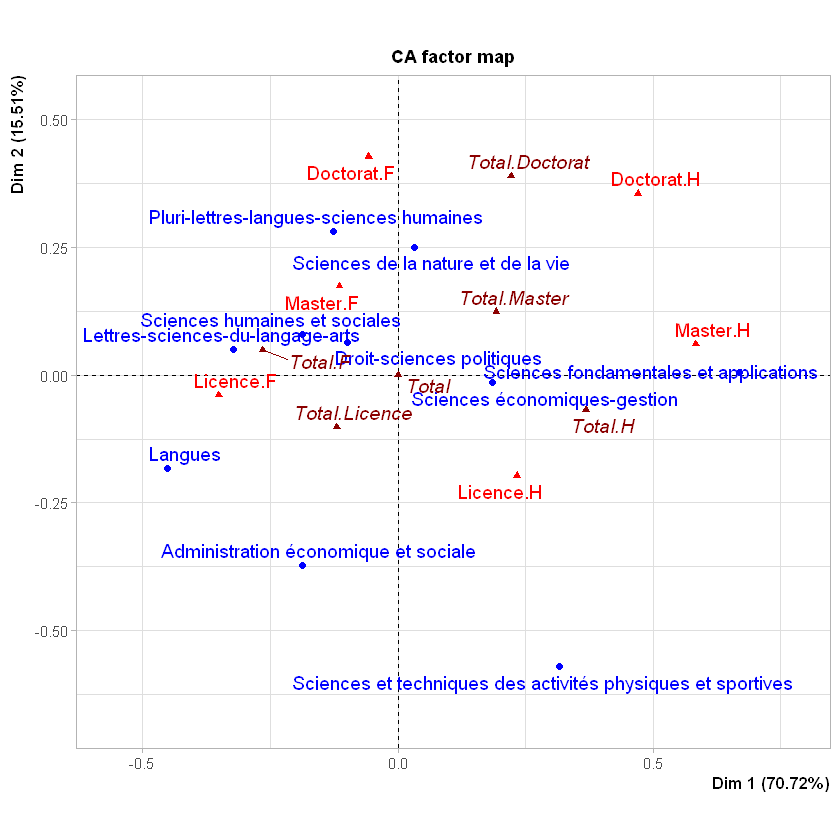

In [6]:
# Conducting Correspondence Analysis (CA) on universite data
res.ca <- CA(universite, col.sup=7:12)

,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,0.117,70.718,70.718
dim 2,0.026,15.508,86.226
dim 3,0.018,10.901,97.127
dim 4,0.004,2.627,99.754
dim 5,0.000,0.246,100.000


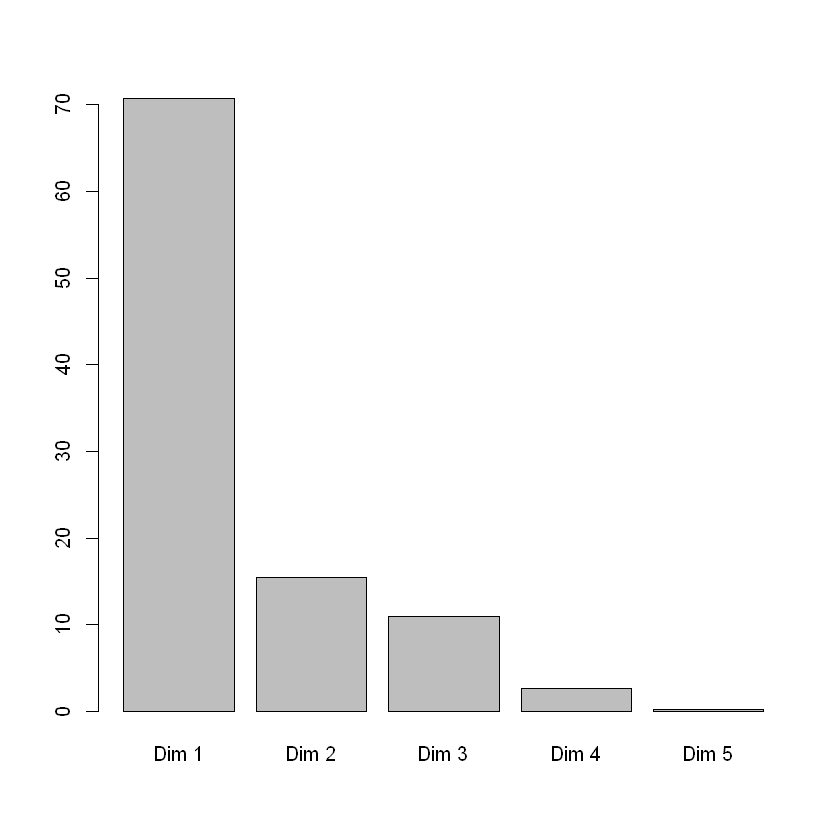

In [7]:
# Bar plot of eigenvalues for CA
barplot(res.ca$eig[,2], names=paste("Dim", 1:nrow(res.ca$eig)))
round(res.ca$eig, 3)

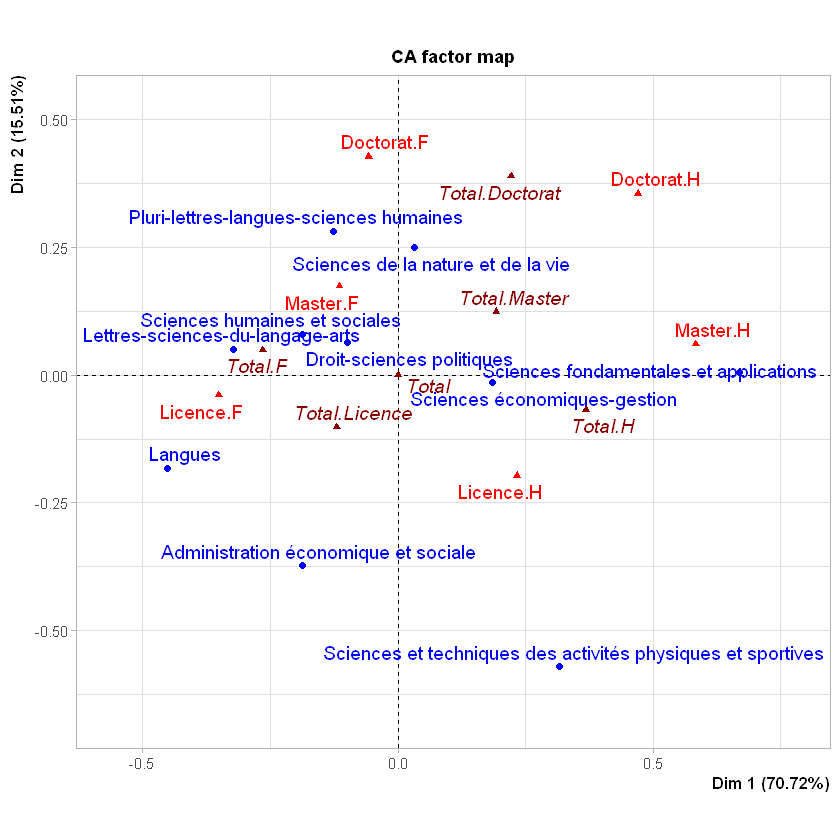

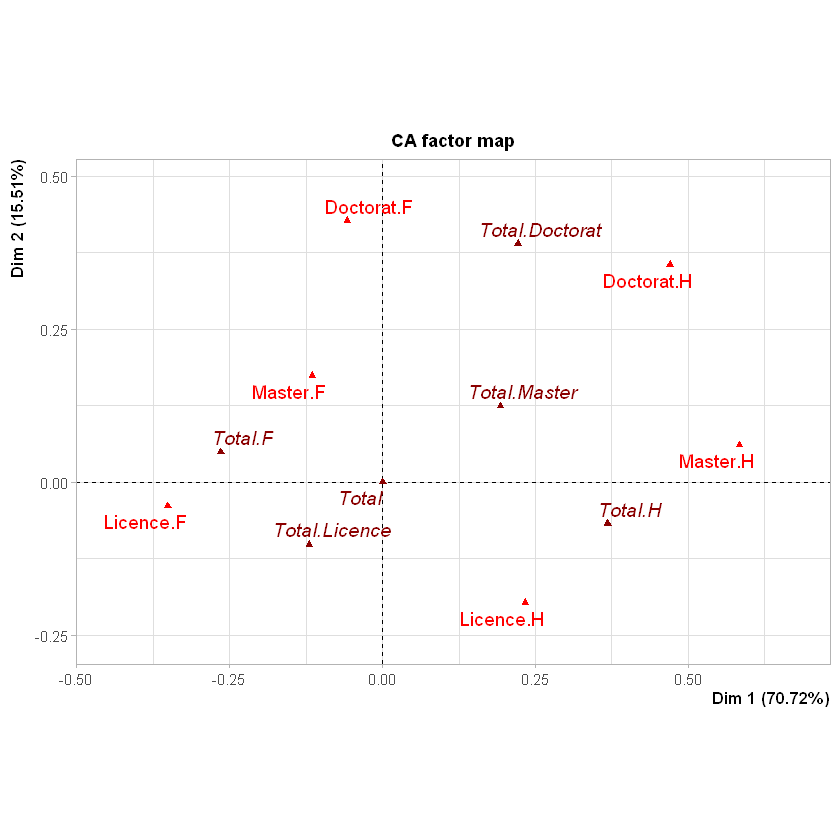

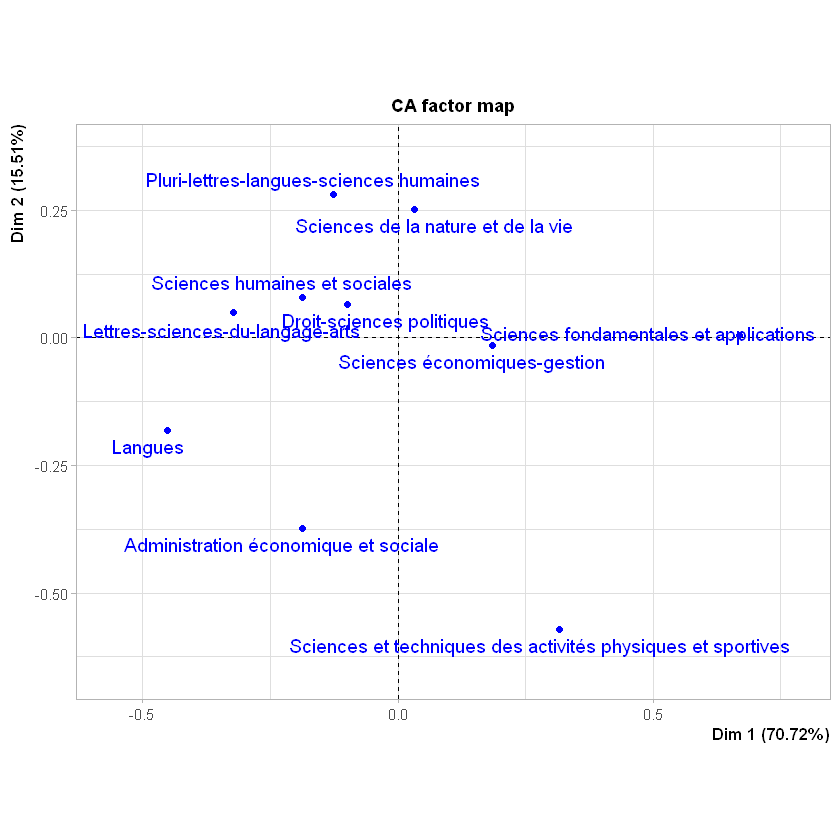

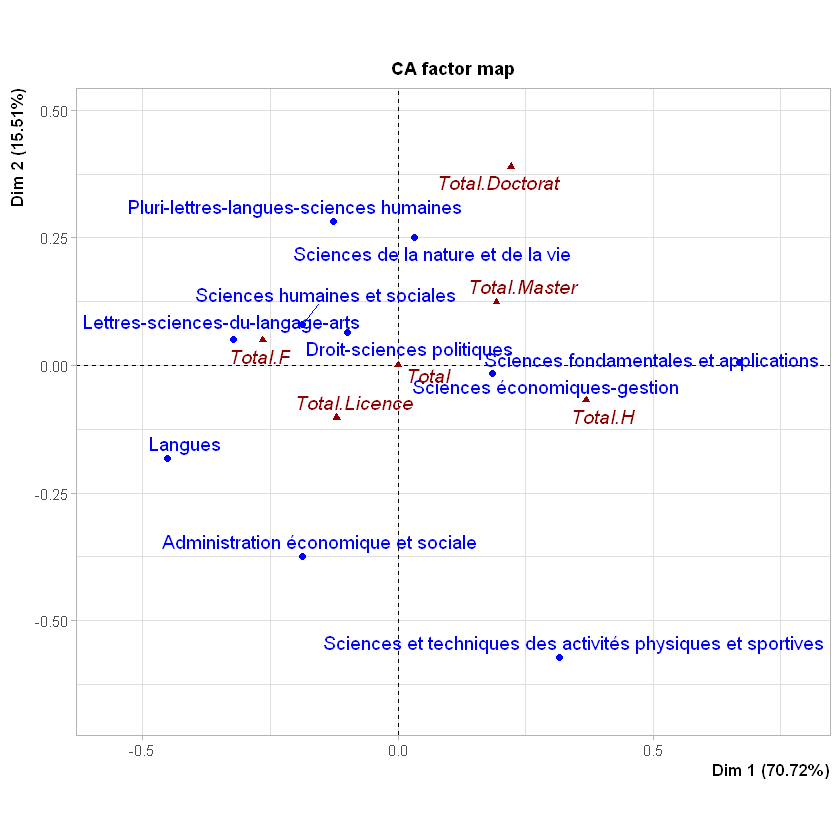

In [8]:
# Plotting CA results
plot(res.ca)
plot(res.ca, invisible="row")
plot(res.ca, invisible=c("col", "col.sup"))
plot(res.ca, invisible = "col")

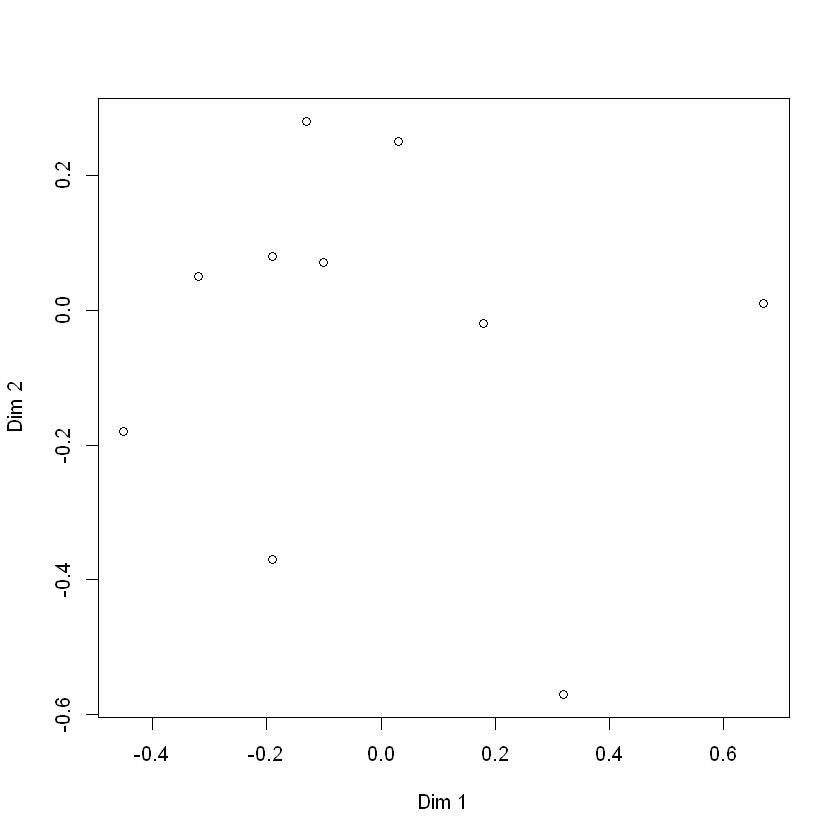

In [9]:
# Display row coordinates, contributions, and cosines
a <- round(cbind(res.ca$row$coord[,1:3], res.ca$row$contrib[,1:3], res.ca$row$cos[,1:3]), 2)
plot(a)

In [10]:
round(cbind(res.ca$col$coord[,1:3], res.ca$col$contrib[,1:3], res.ca$col$cos[,1:3]), 2)

,Dim 1,Dim 2,Dim 3,Dim 1,Dim 2,Dim 3,Dim 1,Dim 2,Dim 3
Licence.F,-0.35,-0.04,0.04,39.72,2.27,3.65,0.96,0.01,0.01
Licence.H,0.23,-0.20,0.03,11.51,37.49,1.21,0.55,0.39,0.01
Master.F,-0.11,0.17,-0.21,1.99,20.90,43.75,0.14,0.33,0.49
Master.H,0.58,0.06,-0.07,40.43,1.97,3.26,0.95,0.01,0.01
Doctorat.F,-0.06,0.43,0.39,0.08,21.02,25.41,0.01,0.49,0.42
Doctorat.H,0.47,0.36,0.35,6.27,16.36,22.71,0.46,0.26,0.26
